## Типы данных и конструирование признаков

На данный момент мы проанализируем данные adalt.data, для выявления признаков и подсчётов разных статистик. К примеру: какая зп? Кто больше зарабатывает от определенной суммы денег, Имеет ли работник образование и тд.

In [66]:
import pandas as pd
from IPython.display import display
import numpy as np
import mglearn
import matplotlib.pyplot as plt

#import scikit-learn library extensions
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

<script src="https://gist.github.com/roachhd/1f029bd4b50b8a524f3c.js"></script>

In [2]:
# файл не содержит заголовков столбцов, поэтому мы передаем header=None
# и записываем имена столбцов прямо в "names"
data = pd.read_csv("G:/Pproject/ml-intro/data/adult.data", header=None, index_col=False, 
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                         'mariral-status', 'occupation', 'relationship', 'race',
                         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
                         'native-country', 'income'])
# в целях упрощения мы выберим лишь некоторые столбцы
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
# проверяем правильность заполнения пола, с помощью количества.
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


В библиотеки <span style="color:#42c5f4">pandas</span> имеется очень просто способ кодирвание данных с помощью функции <span style="color:#42c5f4">get_dummies()</span>

In [4]:
print("Исходные признаки: \n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Признаки после get_dummies: \n", list(data_dummies.columns))

Исходные признаки: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_dummies: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
# берем только те столбцы, которые содержат признаки,
# т.е. все столбцы, начиная с "age" и заканчивая "occupation_ Transport-moving"
# этот диапазон содержит все признаки, кроме целевой переменной
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# извлекаем массивы numpy
X = features.values
y = data_dummies['income_ >50K'].values

print("форма массива X: {} форма массива y: {}".format(X.shape, y.shape))

форма массива X: (32561, 44) форма массива y: (32561,)


Теперь данные представлены в том формате, который компоненты библиотеки scikit-learn умеют обрабатывать, а значит построение модели можно продложить в обычном режиме

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
logreg.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.81


Функция get_dummies в pandas обрабатывает все числа как непрерывные значения и не будет создавать дамми-переменные для них. Описание проблемы ниже.

In [22]:
# создаём дата-фрейм с признаком, который принимает 
# целочисленные значения, и категориальным признаком, значения которого являются строками
demo_df = pd.DataFrame({'Целочисленный признак': [0,1,2,1],
                        'Категориальный признак': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Целочисленный признак,Категориальный признак
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [23]:
# Функция get_dummies закодирует лишь строковые признак,
# тогда как целочисленный признак оставит без изменений
pd.get_dummies(demo_df)

,Целочисленный признак,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


Если создать дамми-переменные и для столбца *Целочисленный признак*, то можно явно указать столбцы, которые нужно закодировать, с помощью параметра columns. И тогда оба признака будут обработаны как категориальные переменные.

In [24]:
demo_df['Целочисленный признак'] = demo_df['Целочисленный признак'].astype(str)
pd.get_dummies(demo_df, columns=['Целочисленный признак', 'Категориальный признак'])

,Целочисленный признак_0,Целочисленный признак_1,Целочисленный признак_2,Категориальный признак_box,Категориальный признак_fox,Категориальный признак_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### Биннинг, дискретизация, линейные модели и деревья

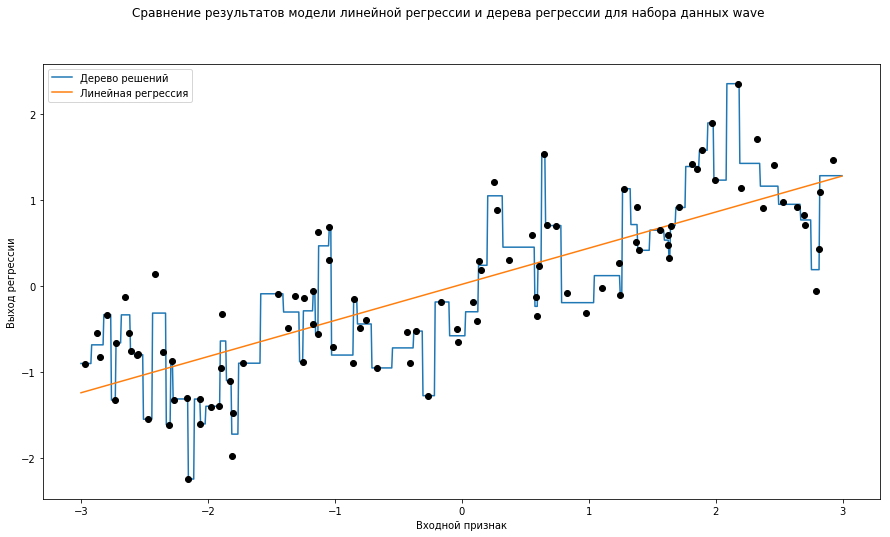

In [52]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

plt.figure(figsize=(15,8))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Дерево решений")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Линейная регрессия")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc="best")
plt.suptitle("Сравнение результатов модели линейной регрессии и дерева регрессии для набора данных wave")
plt.show()

Для повышения прогнозной силы линейных моделей при работе с непрерывными данными является <span style="color: #6b42f4">*бинниг*</span> (*bining*) характеристик, также известный как <span style="color: #6b42f4">*дискретизация*</span>, который разбивает исходный признак на несколько категорий.

In [53]:
# зададим 10 категорий, равномерно распределенных между значениями -3 и 3.
bins = np.linspace(-3, 3, 11)
print("Категорий : {}".format(bins))

Категорий : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [64]:
# записываем для каждой точки данных категорию,в которую он попадает.
which_bin = np.digitize(X, bins=bins)
print("\n Точки данных:\n", X[:5])
print("\n Категории для точек данных: \n", which_bin[:5])


 Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

 Категории для точек данных: 
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [74]:
# выполним прямое кодирование этого дискретного признака с помощью функции OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories="auto")
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


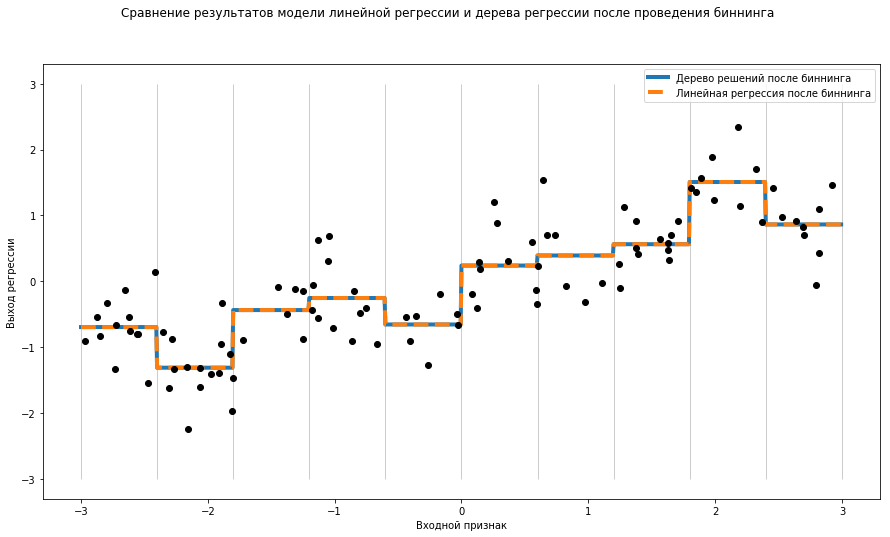

In [92]:
# построим новую модель линейной регрессии и дерева решений на основе данных, 
# приобразованных с помощью прямого кодирования.
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.figure(figsize=(15,8))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Дерево решений после биннинга", linewidth=4)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Линейная регрессия после биннинга", linestyle='dashed', linewidth=4)

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Выход регрессии')
plt.xlabel('Входной признак')
plt.legend(loc="best")
plt.suptitle("Сравнение результатов модели линейной регрессии и дерева регрессии после проведения биннинга")
plt.show()

### Взаимодействия и полиномы